In [4]:

class TSTNode:
    def __init__(self, char):
        self.char = char
        self.left = None
        self.middle = None
        self.right = None
        self.is_end = False

    def __repr__(self):
        return f"TSTNode('{self.char}')"


class TernarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, word):
        if not word:
            return
        self.root = self._insert(self.root, word, 0)

    def _insert(self, node, word, index):
        char = word[index]
        if not node:
            node = TSTNode(char)
        if char < node.char:
            node.left = self._insert(node.left, word, index)
        elif char > node.char:
            node.right = self._insert(node.right, word, index)
        else:
            if index + 1 < len(word):
                node.middle = self._insert(node.middle, word, index + 1)
            else:
                node.is_end = True
        return node

    def search(self, word):
        if not word:
            return False
        return self._search(self.root, word, 0)

    def _search(self, node, word, index):
        if not node:
            return False
        char = word[index]
        if char < node.char:
            return self._search(node.left, word, index)
        elif char > node.char:
            return self._search(node.right, word, index)
        else:
            if index == len(word) - 1:
                return node.is_end
            return self._search(node.middle, word, index + 1)

    def traverse(self):
        words = []
        self._traverse(self.root, '', words)
        return words

    def _traverse(self, node, prefix, result):
        if not node:
            return
        self._traverse(node.left, prefix, result)
        if node.is_end:
            result.append(prefix + node.char)
        self._traverse(node.middle, prefix + node.char, result)
        self._traverse(node.right, prefix, result)

# Sample Test cases are inserted
# Example usage and basic testing
if __name__ == '__main__':
    tst = TernarySearchTree()
    words = ["cat", "cap", "can", "bat", "bag", "bad"]
    for word in words:
        tst.insert(word)

    test_cases = {
        "cat": True,
        "cap": True,
        "cab": False,
        "": False,
        "bat": True,
        "bag": True,
        "dog": False
    }

    for word, expected in test_cases.items():
        result = tst.search(word)
        assert result == expected, f"Test failed for '{word}': expected {expected}, got {result}"

    print("✅ All basic tests passed.")

### TEST CASE FOR WORD TEXT FILE
def load_words_from_file(filepath):
    try:
        with open(filepath, 'r') as file:
            words = [line.strip() for line in file if line.strip()]
        return words
    except FileNotFoundError:
        print(f"❌ File not found: {filepath}")
        return []
if __name__ == '__main__':
    tst = TernarySearchTree()

    # Path to your file (Windows style)
    filepath = r"C:\Users\SUDHIR\Downloads\Project Concept of Data Science\search_trees\insert_words.txt"

    # Load and insert words from the file
    words_from_file = load_words_from_file(filepath)
    for word in words_from_file:
        tst.insert(word)

    print(f"✅ Inserted {len(words_from_file)} words into the TST.")

    # Optional: Traverse and print all inserted words
    print("🌳 Words in TST (via traverse):")
    print(tst.traverse())

    # Optional: Test search
    test_words = ["cat", "banana", "tree", "dog"]
    for word in test_words:
        found = tst.search(word)
        print(f"🔍 Search '{word}': {'Found ✅' if found else 'Not found ❌'}")


class TernarySearchTree:
    def __init__(self):
        self.root = None
        self._size = 0

    def search(self, word):  # <-- Move this above insert()
        if not word:
            return False
        return self._search(self.root, word, 0)

    def _search(self, node, word, index):
        if not node:
            return False
        char = word[index]
        if char < node.char:
            return self._search(node.left, word, index)
        elif char > node.char:
            return self._search(node.right, word, index)
        else:
            if index == len(word) - 1:
                return node.is_end
            return self._search(node.middle, word, index + 1)

    def insert(self, word):
        if not word:
            return
        if not self.search(word):  # Only count new words
            self.root = self._insert(self.root, word, 0)
            self._size += 1

    def _insert(self, node, word, index):
        char = word[index]
        if not node:
            node = TSTNode(char)
        if char < node.char:
            node.left = self._insert(node.left, word, index)
        elif char > node.char:
            node.right = self._insert(node.right, word, index)
        else:
            if index + 1 < len(word):
                node.middle = self._insert(node.middle, word, index + 1)
            else:
                node.is_end = True
        return node

    def __len__(self):
        return self._size

    # Your traverse methods can follow here
    def traverse(self):
        words = []
        self._traverse(self.root, '', words)
        return words

✅ All basic tests passed.
❌ File not found: C:\Users\SUDHIR\Downloads\Project Concept of Data Science\search_trees\insert_words.txt
✅ Inserted 0 words into the TST.
🌳 Words in TST (via traverse):
[]
🔍 Search 'cat': Not found ❌
🔍 Search 'banana': Not found ❌
🔍 Search 'tree': Not found ❌
🔍 Search 'dog': Not found ❌


🚀 Starting insert benchmark...
✅ Insert benchmark complete.
🚀 Starting search benchmark...
✅ Search benchmark complete.


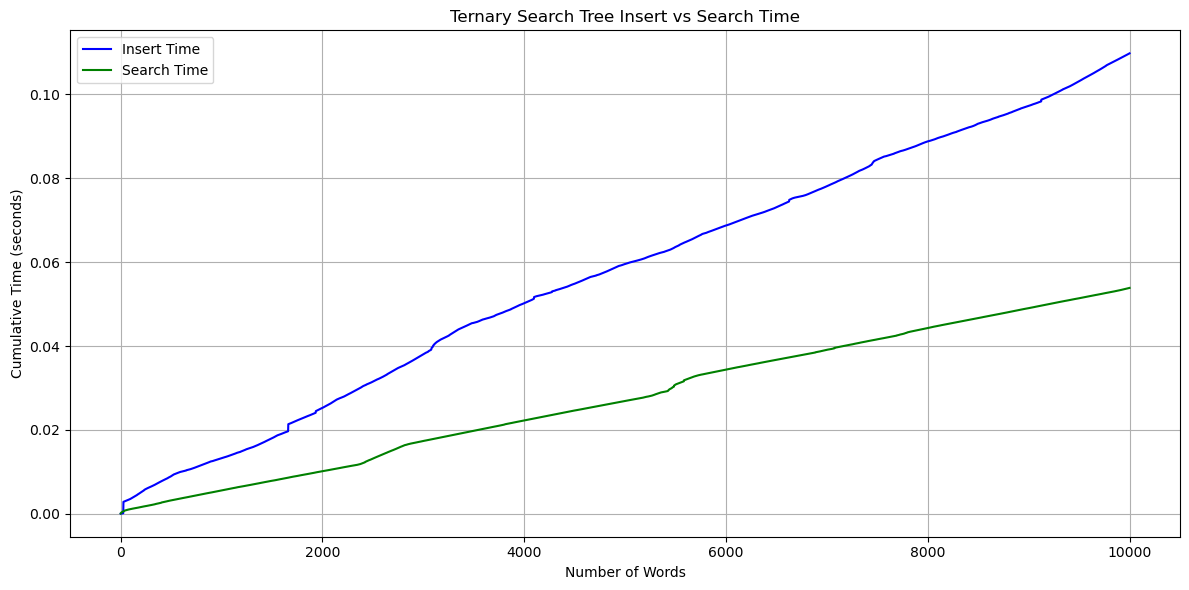

In [2]:
import time
import matplotlib.pyplot as plt
from random import sample

# Assuming TSTNode and TernarySearchTree classes are already defined above

def load_words_from_file(filepath):
    try:
        with open(filepath, 'r') as file:
            words = [line.strip() for line in file if line.strip()]
        return words
    except FileNotFoundError:
        print(f"❌ File not found: {filepath}")
        return []

def benchmark_insert(tst, words):
    insert_times = []
    cumulative_time = 0
    for i, word in enumerate(words, 1):
        start = time.perf_counter()
        tst.insert(word)
        end = time.perf_counter()
        cumulative_time += (end - start)
        insert_times.append((i, cumulative_time))
    return insert_times

def benchmark_search(tst, words):
    search_times = []
    cumulative_time = 0
    for i, word in enumerate(words, 1):
        start = time.perf_counter()
        tst.search(word)
        end = time.perf_counter()
        cumulative_time += (end - start)
        search_times.append((i, cumulative_time))
    return search_times

def plot_results(insert_data, search_data):
    insert_x, insert_y = zip(*insert_data)
    search_x, search_y = zip(*search_data)

    plt.figure(figsize=(12, 6))
    plt.plot(insert_x, insert_y, label='Insert Time', color='blue')
    plt.plot(search_x, search_y, label='Search Time', color='green')
    plt.xlabel("Number of Words")
    plt.ylabel("Cumulative Time (seconds)")
    plt.title("Ternary Search Tree Insert vs Search Time")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    filepath = r"C:\Users\SUDHIR\Downloads\Project Concept of Data Science\search_trees\corncob_lowercase.txt"
    all_words = load_words_from_file(filepath)

    if not all_words:
        exit()

    sample_words = all_words[:10000]  # Adjust to 50K or 100K based on performance

    tst = TernarySearchTree()
    print("🚀 Starting insert benchmark...")
    insert_benchmark = benchmark_insert(tst, sample_words)
    print("✅ Insert benchmark complete.")

    print("🚀 Starting search benchmark...")
    # Use a random sample of inserted words to benchmark realistic search
    search_sample = sample(sample_words, len(sample_words))
    search_benchmark = benchmark_search(tst, search_sample)
    print("✅ Search benchmark complete.")

    plot_results(insert_benchmark, search_benchmark)


In [4]:
filepath = r"C:\Users\SUDHIR\Downloads\Project Concept of Data Science\search_trees\corncob_lowercase.txt"

def count_words_in_file(filepath):
    try:
        with open(filepath, 'r') as file:
            words = [line.strip() for line in file if line.strip()]
        print(f"📄 Total number of words in the file: {len(words)}")
    except FileNotFoundError:
        print(f"❌ File not found: {filepath}")

if __name__ == '__main__':
    count_words_in_file(filepath)


📄 Total number of words in the file: 58110


In [6]:
def load_words_from_file(filepath):
    try:
        with open(filepath, 'r') as file:
            return [line.strip() for line in file if line.strip()]
    except FileNotFoundError:
        print(f"❌ File not found: {filepath}")
        return []

# How to call the function with your specific file path:
file_path_to_load = "/Users/amudhans/Desktop/Concept-Of-Data-Science--1/data/search_trees/.ipynb_checkpoints/not_insert_words-checkpoint.txt"
words = load_words_from_file(file_path_to_load)

if words:
    print(f"Successfully loaded {len(words)} words.")
    # For example, print the first few words:
    print("First 5 words:", words[:5])
else:
    print("No words loaded or file not found.")

Successfully loaded 6 words.
First 5 words: ['futures', 'fontains', 'alphabet', 'gamma', 'monster']


In [8]:
def test_all_inserted_words_are_found():
    print("--- Running Test: All Inserted Words Can Be Found ---")
    
    tst = TernarySearchTree()
    words_to_insert = ["apple", "banana", "apricot", "band", "cat", "car", "dog"]

    # Insert words into the TST
    for word in words_to_insert:
        tst.insert(word)
    
    print(f"Inserted {len(words_to_insert)} words into the TST.")
    print(f"Actual TST size: {len(tst)}")

    # Verify each inserted word can be found
    all_found = True
    for word in words_to_insert:
        found = tst.search(word)
        if not found:
            print(f"❌ Test Failed: '{word}' was inserted but NOT found.")
            all_found = False
        else:
            print(f"✅ Found: '{word}'")
    
    if all_found:
        print("\n✅ All inserted words were successfully found.")
    else:
        print("\n❌ Test Failed: Not all inserted words could be found.")

# Run the test case
if __name__ == '__main__':
    test_all_inserted_words_are_found()

--- Running Test: All Inserted Words Can Be Found ---
Inserted 7 words into the TST.
Actual TST size: 7
✅ Found: 'apple'
✅ Found: 'banana'
✅ Found: 'apricot'
✅ Found: 'band'
✅ Found: 'cat'
✅ Found: 'car'
✅ Found: 'dog'

✅ All inserted words were successfully found.


📄 Loaded 58110 words from file.
🚀 Starting insert benchmark...
📝 Inserted 1000 words...
📝 Inserted 2000 words...
📝 Inserted 3000 words...
📝 Inserted 4000 words...
📝 Inserted 5000 words...
📝 Inserted 6000 words...
📝 Inserted 7000 words...
📝 Inserted 8000 words...
📝 Inserted 9000 words...
📝 Inserted 10000 words...
✅ Insert benchmark complete.
🚀 Starting search benchmark...
🔍 Searched 1000 words...
🔍 Searched 2000 words...
🔍 Searched 3000 words...
🔍 Searched 4000 words...
🔍 Searched 5000 words...
🔍 Searched 6000 words...
🔍 Searched 7000 words...
🔍 Searched 8000 words...
🔍 Searched 9000 words...
🔍 Searched 10000 words...
✅ Search benchmark complete.


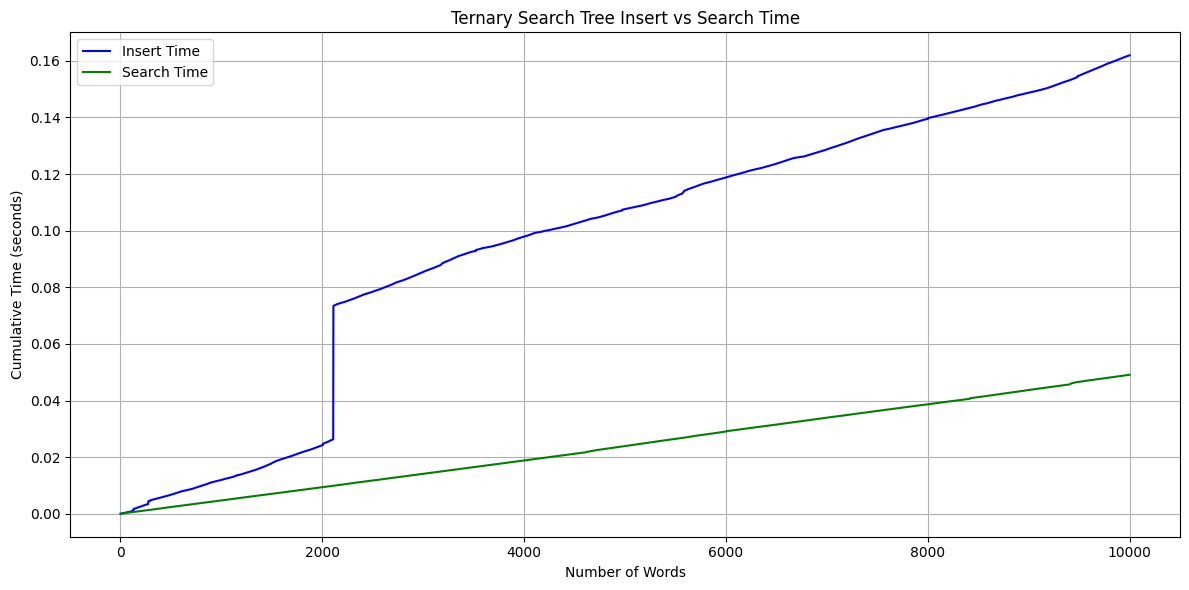

In [5]:
import time
import matplotlib.pyplot as plt
from random import sample

# Assuming TSTNode and TernarySearchTree classes are already defined above

def load_words_from_file(filepath):
    """
    Load words from a given text file. Each line is assumed to contain a single word.
    Empty lines are ignored.
    """
    try:
        with open(filepath, 'r') as file:
            words = [line.strip() for line in file if line.strip()]
        print(f"📄 Loaded {len(words)} words from file.")
        return words
    except FileNotFoundError:
        print(f"❌ File not found: {filepath}")
        return []

def benchmark_insert(tst, words):
    """
    Measure cumulative time taken to insert words into the TST.
    Returns a list of (word index, cumulative time) tuples.
    """
    insert_times = []
    cumulative_time = 0
    for i, word in enumerate(words, 1):
        start = time.perf_counter()
        tst.insert(word)
        end = time.perf_counter()
        cumulative_time += (end - start)
        insert_times.append((i, cumulative_time))
        if i % 1000 == 0:
            print(f"📝 Inserted {i} words...")
    return insert_times

def benchmark_search(tst, words):
    """
    Measure cumulative time taken to search words in the TST.
    Returns a list of (word index, cumulative time) tuples.
    """
    search_times = []
    cumulative_time = 0
    for i, word in enumerate(words, 1):
        start = time.perf_counter()
        tst.search(word)
        end = time.perf_counter()
        cumulative_time += (end - start)
        search_times.append((i, cumulative_time))
        if i % 1000 == 0:
            print(f"🔍 Searched {i} words...")
    return search_times

def plot_results(insert_data, search_data):
    """
    Plot cumulative insert and search times for the TST.
    """
    insert_x, insert_y = zip(*insert_data)
    search_x, search_y = zip(*search_data)

    plt.figure(figsize=(12, 6))
    plt.plot(insert_x, insert_y, label='Insert Time', color='blue')
    plt.plot(search_x, search_y, label='Search Time', color='green')
    plt.xlabel("Number of Words")
    plt.ylabel("Cumulative Time (seconds)")
    plt.title("Ternary Search Tree Insert vs Search Time")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    # Define the file path to the word list
    filepath = r"/Users/amudhans/Desktop/Concept-Of-Data-Science--1/data/search_trees/corncob_lowercase.txt"
    all_words = load_words_from_file(filepath)

    if not all_words:
        print("⚠️ No words loaded. Exiting.")
        exit()

    # Limit the benchmark to 10,000 words
    sample_words = all_words[:10000]

    # Initialize the ternary search tree
    tst = TernarySearchTree()

    # Run insert benchmark
    print("🚀 Starting insert benchmark...")
    insert_benchmark = benchmark_insert(tst, sample_words)
    print("✅ Insert benchmark complete.")

    # Run search benchmark
    print("🚀 Starting search benchmark...")
    search_sample = sample(sample_words, len(sample_words))  # shuffle
    search_benchmark = benchmark_search(tst, search_sample)
    print("✅ Search benchmark complete.")

    # Plot the results
    plot_results(insert_benchmark, search_benchmark)

